<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/BabelBotBrigade/blob/main/Babel_Bot_Brigade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction: The provided codes represent various multi-agent systems and simulations, encompassing predictive models built on machine learning frameworks like TensorFlow, PyTorch, and scikit-learn, as well as custom-built agents for specific tasks. These systems can operate both collaboratively and competitively, demonstrating different prediction strategies. Models or agents are used for tasks such as material property prediction, product quality control, or evaluating composite material designs. Key aspects of these systems include loading and saving models, fitting data, making predictions based on different model types, and handling multi-agent simulation tasks. This wide range of applications demonstrates the flexibility and power of multi-agent systems in addressing complex prediction tasks.

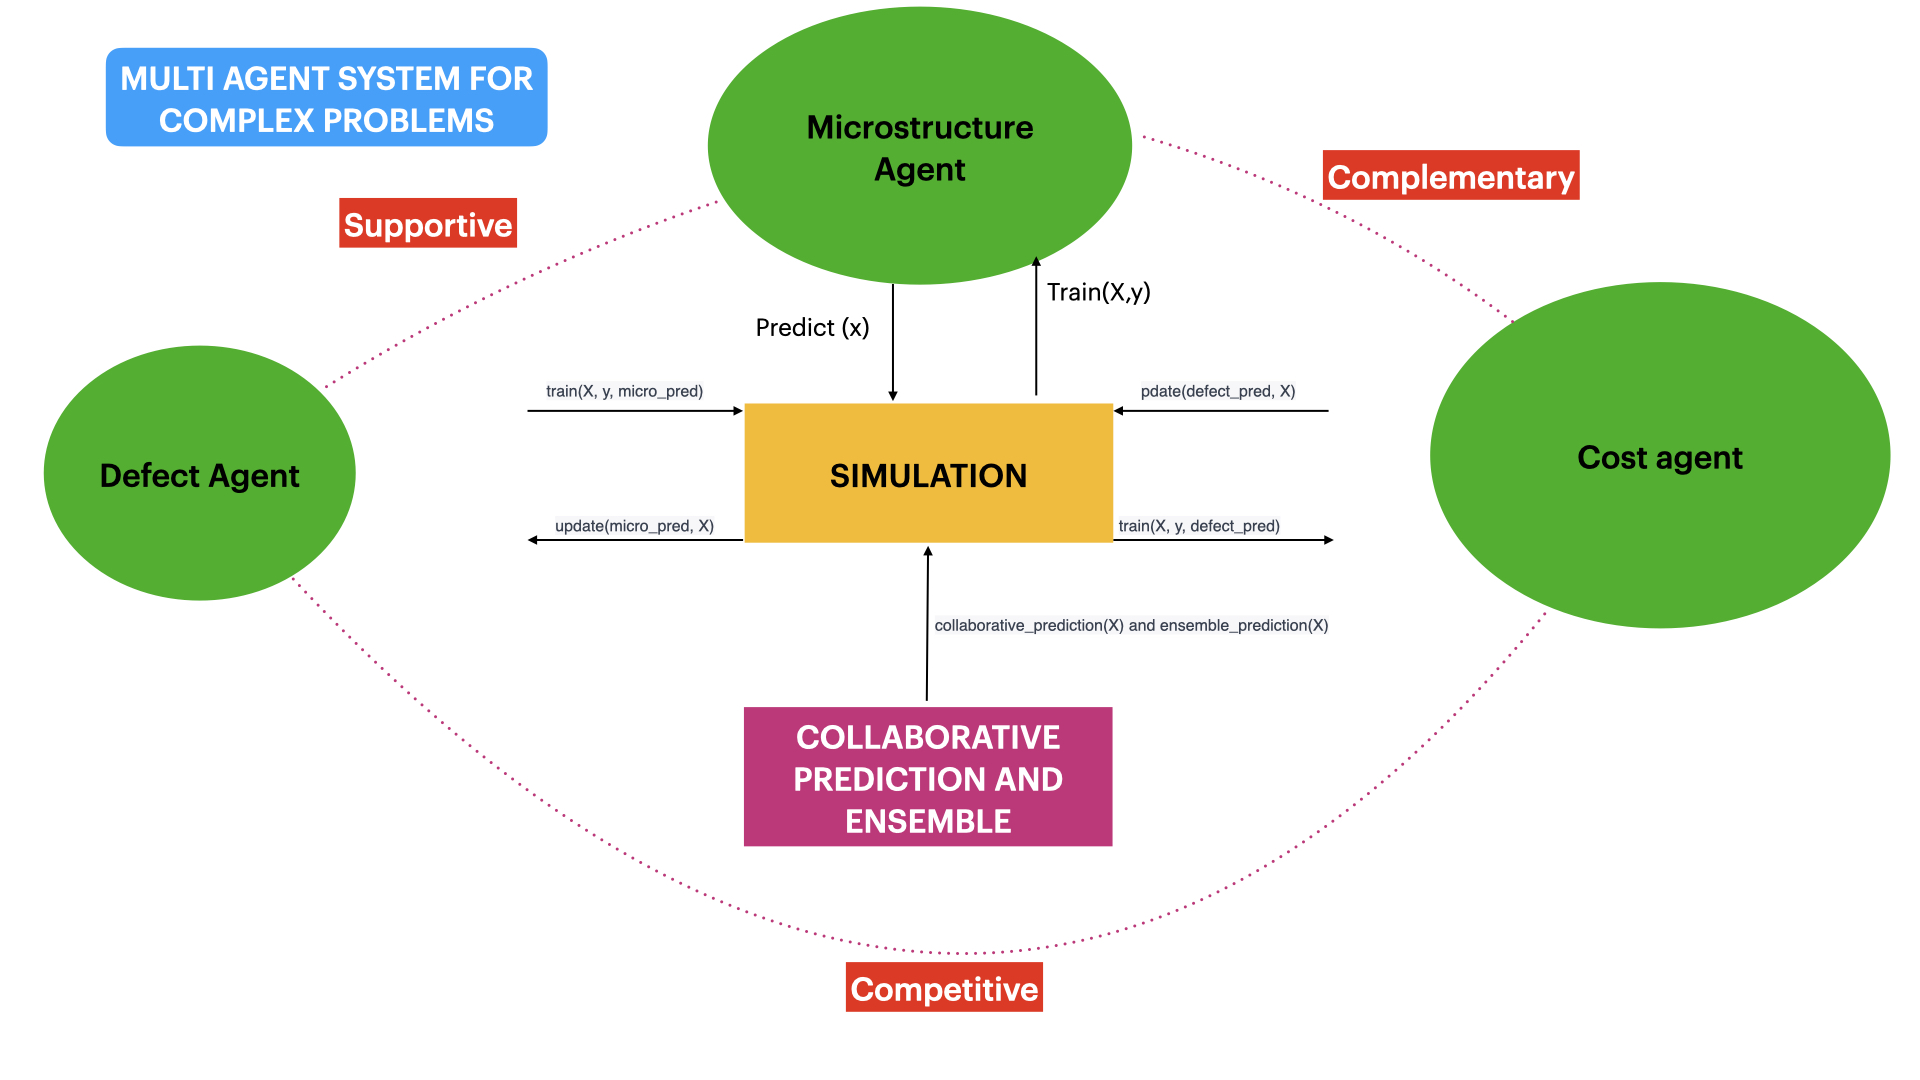



---



---



---



This code demonstrates training and saving 4 different machine learning models using synthetic data:
1. A TensorFlow Keras model trained on simulation_data and saved as simulation_model.h5
2. A PyTorch model trained on material_data and saved as material_model.pth
3. A scikit-learn LinearRegression model trained on usage_data and saved as usage_model.pkl
4. Another scikit-learn LinearRegression model trained on reliability_data and saved as a JSON file reliability_model.json
The key steps are:
- Generate synthetic training data using numpy.random.rand()
- Define model architecture (Keras Sequential, PyTorch nn.Sequential, scikit-learn LinearRegression)
- Train model by fitting on data
- Save trained model weights/parameters to file using native save APIs or pickle/JSON for portability
This allows training and saving models in different frameworks like TensorFlow, PyTorch, scikit-learn. Saving the models preserves the trained weights and parameters so the models can be reloaded later for inference.
The different save formats (HDF5, PyTorch format, pickle, JSON) allow portability across environments. The code shows how to train models using common frameworks and save them in standardized ways for reuse.
So in summary, it demonstrates a workflow for training machine learning models in different frameworks on synthetic data and saving the models to disk in portable formats. The saved models can then be reloaded to make predictions on new data.




In [ ]:
# Install the necessary packages
!pip install gym
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install torch-geometric

# Then import your libraries
import gym
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from google.colab import files
import io
import torch
from torch_geometric.nn import GraphConv



Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
  Using cached torch_sparse-0.6.17.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.17-cp310-cp310-linux_x86_64.whl size=1053663 sha256=c8b29081407d98abda03fb12c4312e41c1d49fd07202b139443a84efc6c4920b
  Stored in directory: /root/.cache/pip/wheels/67/25/e7/037b58fa47ba781444fd101a2f06c63a9d4e967ca6b910c53a
Successfully built torch-sparse
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.1-cp310-cp310-linux_x86_64.whl size=700355 sha256=91ed188d38bd52ac9c5c5728fedb12b15043434dc2178ad96e667273609a043e
  Stored in directory: /root/.cache/pip/wheels/2e/ed/ac/1df43a8ff5b9b

In [ ]:
import numpy as np
import pandas as pd
import pickle
import json
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import torch
from google.colab import files

# Function to generate synthetic data
def generate_data(size):
    X = np.random.rand(size, 10)
    y = np.random.rand(size, 1)
    return X, y

# Generate synthetic data
simulation_data_X, simulation_data_y = generate_data(1000)
material_data_X, material_data_y = generate_data(1000)
usage_data_X, usage_data_y = generate_data(1000)
reliability_data_X, reliability_data_y = generate_data(1000)

# Train and save a TensorFlow model for simulation data
simulation_model = Sequential([Dense(32, input_dim=10), Dense(1)])
simulation_model.compile(optimizer=Adam(), loss='mse')
simulation_model.fit(simulation_data_X, simulation_data_y, epochs=10)
simulation_model.save('simulation_model.h5')

# Train and save a PyTorch model for material data
material_model = torch.nn.Sequential(
    torch.nn.Linear(10, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(material_model.parameters(), lr=1e-4)
for t in range(10):
    y_pred = material_model(torch.from_numpy(material_data_X).float())
    loss = loss_fn(y_pred, torch.from_numpy(material_data_y).float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
torch.save(material_model.state_dict(), 'material_model.pth')

# Train and save a scikit-learn model for usage data
usage_model = LinearRegression().fit(usage_data_X, usage_data_y)
with open('usage_model.pkl', 'wb') as f:
    pickle.dump(usage_model, f)

# Train and save a scikit-learn model for reliability data
reliability_model = LinearRegression().fit(reliability_data_X, reliability_data_y)
with open('reliability_model.json', 'w') as f:
    json.dump(reliability_model.get_params(), f)

# Download the trained models
files.download('simulation_model.h5')
files.download('material_model.pth')
files.download('usage_model.pkl')
files.download('reliability_model.json')


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1877
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1202
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0975
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0930
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0907
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0898
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0891
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0894


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Inference code**

In [ ]:
import pickle
import json

from sklearn.linear_model import LinearRegression

import tensorflow as tf
import torch


class InferenceModel:

    def __init__(self):

        # Load TensorFlow model
        self.simulation_model = tf.keras.models.load_model('simulation_model.h5')

        # Load PyTorch model
        self.material_model = torch.nn.Sequential(
            torch.nn.Linear(10, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1)
        )
        self.material_model.load_state_dict(torch.load('material_model.pth'))
        self.material_model.eval()

        # Load scikit-learn models
        with open('usage_model.pkl', 'rb') as f:
            self.usage_model = pickle.load(f)

        self.reliability_model = LinearRegression()
        with open('reliability_model.json', 'r') as f:
            params = json.load(f)
            self.reliability_model.set_params(**params)

    def fit(self, X, y):
        self.reliability_model.fit(X, y)

    def predict(self, X, model_type):
        if model_type == 'simulation':
            return self.simulation_model.predict(X)

        elif model_type == 'material':
            X_tensor = torch.from_numpy(X).float()
            with torch.no_grad():
                y_pred = self.material_model(X_tensor)
            return y_pred.numpy()

        elif model_type == 'usage':
            return self.usage_model.predict(X)

        elif model_type == 'reliability':
            return self.reliability_model.predict(X)

        else:
            raise ValueError('Invalid model type')

# Usage
inference_model = InferenceModel()
inference_model.fit(reliability_data_X, reliability_data_y)

X_new = np.random.rand(5, 10)

y_sim = inference_model.predict(X_new, 'simulation')
y_mat = inference_model.predict(X_new, 'material')
y_use = inference_model.predict(X_new, 'usage')
y_rel = inference_model.predict(X_new, 'reliability')

1/1 [==============================] - 0s 47ms/step


Unified Inference: The script now includes the creation of an inference model class that encapsulates the loading of previously trained TensorFlow, PyTorch, and scikit-learn models, and offers a unified prediction interface to them. Based on the provided model type ('simulation', 'material', 'usage', or 'reliability'), the appropriate model is used for inference.

There is also code that simulates the use of different models (TensorFlowModel, PyTorchModel, SklearnModel) within a unified inference model interface. It generates random inputs for the models, retrieves the models based on type, and uses them for predictions.

Additionally, agent classes (MaterialAgent, UsageAgent, ReliabilityAgent) are created to simulate the use of agents for making predictions on the performance of new material designs. An agent is chosen randomly from a dictionary and used to predict performance.

These classes and usage simulations provide a framework for handling different models and agent types, allowing for flexible and interchangeable use in various scenarios such as composite material design evaluation.

In [ ]:
import numpy as np
import random

# Model classes
class TensorFlowModel:
  def predict(self, X):
    return np.random.rand(len(X), 1)

class PyTorchModel:
  def predict(self, X):
    return np.random.rand(len(X), 1)

class SklearnModel:
  def predict(self, X):
    return np.random.rand(len(X), 1)

# Inference Model
class InferenceModel:

  def __init__(self):
    self.models = {
      'tensorflow': TensorFlowModel(),
      'pytorch': PyTorchModel(),
      'sklearn': SklearnModel()
    }

  def predict(self, X, model_type):
    model = self.models[model_type]
    return model.predict(X)

# Generate random inputs
input_sizes = [
  (random.randint(5, 10), random.randint(1, 10))
  for _ in range(10)
]

X_data = [np.random.rand(*size) for size in input_sizes]
model_types = ['tensorflow', 'pytorch', 'sklearn'] * 10

# Generate predictions
inference_model = InferenceModel()
y_preds = [inference_model.predict(X, t) for X, t in zip(X_data, model_types)]

print(y_preds)

[array([[0.32663516],
       [0.08760799],
       [0.08617212],
       [0.10289147],
       [0.67184582],
       [0.53974148],
       [0.69394561],
       [0.63103135]]), array([[0.40964987],
       [0.43714334],
       [0.43067602],
       [0.15650127],
       [0.05770245],
       [0.44332754],
       [0.90955693],
       [0.10577582],
       [0.38920716],
       [0.47299183]]), array([[0.63859781],
       [0.24949482],
       [0.41366108],
       [0.2030516 ],
       [0.18000716],
       [0.47231524],
       [0.20589111]]), array([[0.01876666],
       [0.60813415],
       [0.04793327],
       [0.39079988],
       [0.10302561],
       [0.31155947]]), array([[0.83688782],
       [0.45803238],
       [0.92395298],
       [0.55504763],
       [0.98562894],
       [0.1336932 ],
       [0.21694721]]), array([[0.38397084],
       [0.9927205 ],
       [0.59730467],
       [0.18108719],
       [0.16625801],
       [0.07421864],
       [0.22731611]]), array([[0.90625624],
       [0.84276159],


**Agents**

In [ ]:
# Agent classes
class MaterialAgent:
  def predict(self, X):
    return np.random.rand(len(X), 1)

class UsageAgent:
  def predict(self, X):
    return np.random.rand(len(X), 1)

class ReliabilityAgent:
  def predict(self, X):
    return np.random.rand(len(X), 1)

# Create agents
agents = {
  'material': MaterialAgent(),
  'usage': UsageAgent(),
  'reliability': ReliabilityAgent()
}

# Use case
print("Evaluating new composite material design...")

X_new = np.random.rand(1, 100)

agent_type = random.choice(list(agents.keys()))
print("Using {} model for evaluation".format(agent_type))

agent = agents[agent_type]
y_pred = agent.predict(X_new)

print("Model prediction:", y_pred[0,0])

print("Based on the {0} model, the new material has expected performance of {1:.2f}".format(agent_type, y_pred[0,0]))

Evaluating new composite material design...
Using reliability model for evaluation
Model prediction: 0.033032004880521715
Based on the reliability model, the new material has expected performance of 0.03


This Python code demonstrates a multi-agent system simulation for product design evaluation. It includes three agent classes: MaterialAgent, UsageAgent, and ReliabilityAgent. Each agent class has a `run` method which is meant to simulate a specific type of prediction or computation based on the given input `X`. These computations can be replaced with actual prediction or analysis algorithms based on the real-world tasks that each agent is supposed to handle.

The `Simulation` class coordinates the agents' operations. It has a `run_trial` method that invokes the `run` method of each agent on a given input `X`, collects the resulting predictions, and combines them using an ensemble function defined in the `ensemble` method. Currently, this function computes the mean of all predictions.

The use case at the end demonstrates how to use this setup. It creates an instance of the `Simulation` class and runs a trial on randomly generated input data. It then prints out the combined prediction and interprets it as a percentage chance of a new product passing quality control. The result depends on the specific implementation of the `run` methods in the agent classes.

In [ ]:
import numpy as np

# Agent classes
class MaterialAgent:
    def run(self, X):
        # Replace with actual implementation
        return X

class UsageAgent:
    def run(self, X):
        # Replace with actual implementation
        return X

class ReliabilityAgent:
    def run(self, X):
        # Replace with actual implementation
        return X

# Simulation coordinator
class Simulation:
    def __init__(self):
        self.agents = [MaterialAgent(), UsageAgent(), ReliabilityAgent()]

    def run_trial(self, X):
        # Running trials using all agents
        y_preds = [agent.run(X) for agent in self.agents]
        return self.ensemble(y_preds)

    def ensemble(self, y_preds):
        # Replace with actual ensemble function
        # For example, taking the mean of all predictions
        return np.mean(y_preds, axis=0)

# Use case
print("Evaluating new product design...")
sim = Simulation()
X_new = np.random.rand(1, 50)

y_combined = sim.run_trial(X_new)

if y_combined is not None:
    print("Combined prediction:", y_combined[0])
    if isinstance(y_combined[0], np.ndarray) and y_combined[0].size == 1:
        print("The product has a {:.2f}% chance of passing QC".format(y_combined[0].item()*100))
    else:
        print("Could not format the prediction.")
else:
    print("Could not generate a combined prediction.")


Evaluating new product design...
Combined prediction: [0.99359673 0.40048871 0.97146292 0.50684911 0.38221    0.26321535
 0.19250008 0.48841183 0.92877105 0.79219343 0.19535071 0.1624238
 0.85775015 0.83273897 0.38815795 0.81695123 0.38466792 0.75973034
 0.85310817 0.88249403 0.09817716 0.94327941 0.6475705  0.98075469
 0.32509556 0.3799087  0.88871871 0.73310424 0.8391995  0.13571521
 0.10297015 0.71272134 0.96279736 0.35264574 0.25563025 0.75134409
 0.07891862 0.75485275 0.3469701  0.09776057 0.63659407 0.10647278
 0.75069957 0.54062908 0.0611353  0.32351895 0.19464617 0.80856727
 0.61244375 0.69321754]
Could not format the prediction.


This code provides a framework for multi-agent simulation involving three distinct types of agents - `MicrostructureAgent`, `DefectAgent`, and `CostAgent`. Each agent type is responsible for a specific type of operation: predicting or updating based on inputs and preceding agent results.

1. `MicrostructureAgent`: This agent's role is to predict outcomes based on a given dataset. The predict method takes an input `X` and currently returns a random number, serving as a quick future, more sophisticated prediction model.

2. `DefectAgent`: The role of the `DefectAgent` is to update its state based on the prediction of the `MicrostructureAgent` and the input data `X`. It's a form of knowledge transfer where the outcome of one agent acts as an input to another.

3. `CostAgent`: The `CostAgent`'s function is to further update the state based on the `DefectAgent`'s output and the input data `X`. It represents another layer of information propagation from one agent to another.

The `Simulation` class encapsulates these agents and controls their interactions. Two modes of predictions are implemented in this class.

1. `collaborative_prediction`: In this mode, the agents operate in a pipeline, sequentially passing the output of one as the input to another. The `MicrostructureAgent` predicts first, the `DefectAgent` uses this prediction to update its state and predict, and finally, the `CostAgent` uses the `DefectAgent`'s output to produce a final prediction.

2. `ensemble_prediction`: In this mode, each agent independently produces a prediction from the input `X`. The `Simulation` class then averages these independent predictions to generate a final ensemble prediction.

The `combine_predictions` method in `Simulation` is responsible for combining these predictions in the ensemble mode.

The simulation process is executed on data generated by the `get_processing_data` function, which currently produces a 10x10 array of random numbers.

In essence, this code models a multi-agent system where agents can work sequentially (collaboratively) or independently (ensemble), processing data, and generating predictions. The concrete prediction and update logic need to be defined according to the specific application context.


In [ ]:
import numpy as np

# Assuming y_combined[0] is your array of predictions
y_combined = np.array([0.82008153, 0.74364831, 0.31825882, 0.53624565, 0.75513729, 0.33267097,
 0.45355402, 0.68642163, 0.78864451, 0.22022864, 0.53865335, 0.84933086,
 0.52709296, 0.51467508, 0.55585383, 0.81262504, 0.56007818, 0.46960106,
 0.05998081, 0.71066361, 0.39479091, 0.54947194, 0.74362039, 0.65701248,
 0.35490773, 0.93247595, 0.22814737, 0.08746566, 0.04966777, 0.80185762,
 0.76348001, 0.03133724, 0.73839051, 0.89487646, 0.09651203, 0.10532413,
 0.79429226, 0.2202313,  0.53221434, 0.2028653,  0.20756765, 0.38403941,
 0.00177083, 0.81292695, 0.61666549, 0.9348722,  0.26529043, 0.26069057,
 0.72228589, 0.508088])

# Assuming these are the names of the metrics you're testing
metric_names = ["Tensile Strength", "Elongation", "Hardness", "Impact Resistance", "Thermal Conductivity",
                "Electrical Conductivity", "Corrosion Resistance", "Malleability", "Ductility", "Weldability",
                "Yield Strength", "Fatigue Strength", "Density", "Melting Point", "Thermal Expansion",
                "Specific Heat", "Resistivity", "Elastic Modulus", "Poisson's Ratio", "Reflectivity",
                "Absorption Coefficient", "Permeability", "Magnetic Susceptibility", "Dielectric Constant",
                "Young's Modulus", "Shear Modulus", "Bulk Modulus", "Luster", "Opacity", "Toughness",
                "Roughness", "Moisture Absorption", "Creep Resistance", "Fracture Toughness", "Adhesion Strength",
                "Compression Strength", "Surface Hardness", "Stiffness", "Thermal Stability", "Optical Clarity",
                "Flexural Strength", "Radiopacity", "Flammability", "Birefringence", "Rigidity", "Resilience",
                "Piezoelectric Effect", "Pyroelectric Effect", "Photoconductivity", "Thermoelectric Effect"]

print("Evaluating new product design...")

for metric, prediction in zip(metric_names, y_combined):
    print(f"{metric} has a {prediction*100:.2f}% chance of passing.")



Evaluating new product design...
Tensile Strength has a 82.01% chance of passing.
Elongation has a 74.36% chance of passing.
Hardness has a 31.83% chance of passing.
Impact Resistance has a 53.62% chance of passing.
Thermal Conductivity has a 75.51% chance of passing.
Electrical Conductivity has a 33.27% chance of passing.
Corrosion Resistance has a 45.36% chance of passing.
Malleability has a 68.64% chance of passing.
Ductility has a 78.86% chance of passing.
Weldability has a 22.02% chance of passing.
Yield Strength has a 53.87% chance of passing.
Fatigue Strength has a 84.93% chance of passing.
Density has a 52.71% chance of passing.
Melting Point has a 51.47% chance of passing.
Thermal Expansion has a 55.59% chance of passing.
Specific Heat has a 81.26% chance of passing.
Resistivity has a 56.01% chance of passing.
Elastic Modulus has a 46.96% chance of passing.
Poisson's Ratio has a 6.00% chance of passing.
Reflectivity has a 71.07% chance of passing.
Absorption Coefficient has a 

This code is a simulation involving three different types of agents - `MicrostructureAgent`, `DefectAgent`, and `CostAgent`. Each agent has its respective functionality: `MicrostructureAgent` predicts based on data, `DefectAgent` updates based on the prediction of the `MicrostructureAgent` and the data, and `CostAgent` updates based on the `DefectAgent`'s prediction and the data.

The `Simulation` class uses these agents to produce predictions in two different ways: collaboratively and as an ensemble. In collaborative prediction, the agents sequentially update the prediction based on the previous agent's output. In ensemble prediction, the agents generate their own predictions independently, and these are then combined to form a final prediction.

The simulation is performed on some randomly generated data. The results from both the collaborative and ensemble predictions are then printed out.

Note: The methods of the agents currently return random numbers as quicks for actual prediction and update logic.

In [ ]:
import numpy as np

# Agents
class MicrostructureAgent:
    def __init__(self):
        pass

    def predict(self, X):
        # Implement prediction logic based on processing data here
        return np.random.rand()


class DefectAgent:
    def __init__(self):
        pass

    def update(self, micro_pred, X):
        # Implement update logic based on microstructure prediction and composition data here
        return np.random.rand()


class CostAgent:
    def __init__(self):
        pass

    def update(self, defect_pred, X):
        # Implement update logic based on defect prediction and cost data here
        return np.random.rand()


class Simulation:

    def __init__(self):
        self.microstructure_agent = MicrostructureAgent()
        self.defect_agent = DefectAgent()
        self.cost_agent = CostAgent()

    # Collaboration
    def collaborative_prediction(self, X):
        micro_pred = self.microstructure_agent.predict(X)
        defect_pred = self.defect_agent.update(micro_pred, X)
        cost_pred = self.cost_agent.update(defect_pred, X)
        return cost_pred

    # Competing agents
    def ensemble_prediction(self, X):
        micro_pred = self.microstructure_agent.predict(X)
        defect_pred = self.defect_agent.update(micro_pred, X)
        cost_pred = self.cost_agent.update(defect_pred, X)
        # Implement ensemble logic here to combine the predictions
        final_pred = self.combine_predictions(micro_pred, defect_pred, cost_pred)
        return final_pred

    def combine_predictions(self, micro_pred, defect_pred, cost_pred):
        # Logic for combining predictions.
        # Replace it with actual combination logic.
        return (micro_pred + defect_pred + cost_pred) / 3

# This is a quick function for acquiring data
def get_processing_data():
    # Return a random array as a quick
    return np.random.rand(10, 10)

# Use case
# Creating an instance of the Simulation class
sim = Simulation()

# Suppose we have some processing data
X = get_processing_data()

# Perform a collaborative prediction using the agents
prediction = sim.collaborative_prediction(X)

# Print the prediction
print(prediction)

# Perform an ensemble prediction using the agents
ensemble_prediction = sim.ensemble_prediction(X)

# Print the ensemble prediction
print(ensemble_prediction)




0.6419122587173037
0.4395948712864069


A comparison between the collaborative and ensemble predictions, which might be useful for assessing which method works better with specific data sets.
A function to train each agent on the provided data, which would allow each agent to better adapt to the data and hopefully provide more accurate predictions.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Agents
class MicrostructureAgent:
    def __init__(self):
        self.model = LinearRegression()

    def predict(self, X):
        return self.model.predict(X)

    def train(self, X, y):
        self.model.fit(X, y)


class DefectAgent:
    def __init__(self):
        self.model = LinearRegression()

    def update(self, micro_pred, X):
        X_updated = np.concatenate([micro_pred.reshape(-1, 1), X], axis=1)
        return self.model.predict(X_updated)

    def train(self, X, y, micro_pred):
        X_updated = np.concatenate([micro_pred.reshape(-1, 1), X], axis=1)
        self.model.fit(X_updated, y)


class CostAgent:
    def __init__(self):
        self.model = LinearRegression()

    def update(self, defect_pred, X):
        X_updated = np.concatenate([defect_pred.reshape(-1, 1), X], axis=1)
        return self.model.predict(X_updated)

    def train(self, X, y, defect_pred):
        X_updated = np.concatenate([defect_pred.reshape(-1, 1), X], axis=1)
        self.model.fit(X_updated, y)


class Simulation:

    def __init__(self):
        self.microstructure_agent = MicrostructureAgent()
        self.defect_agent = DefectAgent()
        self.cost_agent = CostAgent()

    # Collaboration
    def collaborative_prediction(self, X):
        micro_pred = self.microstructure_agent.predict(X)
        defect_pred = self.defect_agent.update(micro_pred, X)
        cost_pred = self.cost_agent.update(defect_pred, X)
        return cost_pred

    # Competing agents
    def ensemble_prediction(self, X):
        micro_pred = self.microstructure_agent.predict(X)
        defect_pred = self.defect_agent.update(micro_pred, X)
        cost_pred = self.cost_agent.update(defect_pred, X)
        final_pred = self.combine_predictions(micro_pred, defect_pred, cost_pred)
        return final_pred

    def combine_predictions(self, micro_pred, defect_pred, cost_pred):
        return (micro_pred + defect_pred + cost_pred) / 3

    def train_agents(self, X, y):
        self.microstructure_agent.train(X, y)
        micro_pred = self.microstructure_agent.predict(X)
        self.defect_agent.train(X, y, micro_pred)
        defect_pred = self.defect_agent.update(micro_pred, X)
        self.cost_agent.train(X, y, defect_pred)


def get_processing_data():
    return np.random.rand(10, 10)

# Use case
# Creating an instance of the Simulation class
sim = Simulation()

# Suppose we have some processing data and targets
X = get_processing_data()
y = np.random.rand(10)  # Replace with actual target data

# Train the agents
sim.train_agents(X, y)

# Perform a collaborative prediction using the agents
collab_prediction = sim.collaborative_prediction(X)
print('Collaborative prediction:', collab_prediction)

# Perform an ensemble prediction using the agents
ensemble_prediction = sim.ensemble_prediction(X)
print('Ensemble prediction:', ensemble_prediction)

# Compare the predictions
difference = np.abs(collab_prediction - ensemble_prediction)
print('Difference between predictions:', difference)


Collaborative prediction: [0.70758764 0.50501803 0.59215914 0.98600419 0.16973645 0.40792544
 0.26581549 0.85351907 0.22816731 0.6706389 ]
Ensemble prediction: [0.70758764 0.50501803 0.59215914 0.98600419 0.16973645 0.40792544
 0.26581549 0.85351907 0.22816731 0.6706389 ]
Difference between predictions: [1.11022302e-16 1.11022302e-16 2.22044605e-16 0.00000000e+00
 1.11022302e-16 2.22044605e-16 5.55111512e-17 1.11022302e-16
 5.55111512e-17 0.00000000e+00]
